## Description
- Pneumonia is an inflammatory condition of the lung primarily affecting the small air sacs known as alveoli.
- According to WHO, Pneumonia is the single largest infectious cause of death in children worldwide.
- Diagnosis is often based on symptoms and physical examination. Chest X-rays are usually used for the diagnosis.
- Earlier the detection of Pneumania, the better chance of survival. 
- Here I am building a Deep Learning model using Transfer Learning technique to classify chest x-rays images so as to identify whether the patient has Pneumonia or not

Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Procedure:
- Use different Models : VGG 16, Resnet 50, VGG 19, Inception V3
- Compare performances: Training loss, validation loss and accuracy
- Save the best perfroming model

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [3]:
train_path = 'chest_xray/train' # training data
valid_path = 'chest_xray/val' # validation data
test_path = 'chest_xray/test' # test data

In [4]:
# re-size all the images to required format
IMAGE_SIZE = [224, 224]

In [5]:
# To get number of output classes
folders = glob('chest_xray/train/*')

In [6]:
# Using the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=4)

Found 4193 images belonging to 2 classes.


In [8]:
valid_set = valid_datagen.flow_from_directory('chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False,
                                            seed=4)

Found 1039 images belonging to 2 classes.


In [66]:
test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = None,
                                            shuffle=False,
                                            seed=4)

Found 624 images belonging to 1 classes.


### VGG 16 Model

In [30]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [31]:
# Add preprocessing layer to the front of VGG
# using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [32]:
# Need not train existing weights. Using them
for layer in vgg16.layers:
    layer.trainable = False

In [33]:
#Layers
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [34]:
# Model object
vgg16_model = Model(inputs=vgg16.input, outputs=prediction)

In [35]:
vgg16_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [36]:
# Compile vgg16_model
vgg16_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
# fit the vgg16_model
r_vgg16 = vgg16_model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 132 steps, validate for 33 steps
Epoch 1/5
132/132 [==============================] - 1377s 10s/step - loss: 0.7593 - accuracy: 0.8235 - val_loss: 0.1844 - val_accuracy: 0.9249
Epoch 2/5
132/132 [==============================] - 1278s 10s/step - loss: 0.1689 - accuracy: 0.9392 - val_loss: 0.2002 - val_accuracy: 0.9115
Epoch 3/5
132/132 [==============================] - 1259s 10s/step - loss: 0.2515 - accuracy: 0.9118 - val_loss: 0.5095 - val_accuracy: 0.8691
Epoch 4/5
132/132 [==============================] - 1281s 10s/step - loss: 0.1485 - accuracy: 0.9530 - val_loss: 0.2052 - val_accuracy: 0.9307
Epoch 5/5
132/132 [==============================] - 1273s 10s/step - loss: 0.1446 - accuracy: 0.9449 - val_loss: 0.2398 - val_accuracy: 0.9249


In [58]:
# save model and architecture to single file
vgg16_model.save("vgg16_model_h5.h5")
print("Saved model to disk")

Saved model to disk


### Resnet 50 Model

In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [39]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
for layer in resnet50.layers:
    layer.trainable = False

In [41]:
x = Flatten()(resnet50.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [42]:
# Model object
resnet50_model = Model(inputs=resnet50.input, outputs=prediction)

In [43]:
resnet50_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [44]:
# Compile resnet50_model
resnet50_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [45]:
# fit the resnet50_model
r_resnet50 = resnet50_model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 132 steps, validate for 33 steps
Epoch 1/5
132/132 [==============================] - 1371s 10s/step - loss: 7.7519 - accuracy: 0.8726 - val_loss: 5.5237 - val_accuracy: 0.7498
Epoch 2/5
132/132 [==============================] - 1375s 10s/step - loss: 0.3766 - accuracy: 0.9716 - val_loss: 1.8535 - val_accuracy: 0.7498
Epoch 3/5
132/132 [==============================] - 1379s 10s/step - loss: 0.1290 - accuracy: 0.9890 - val_loss: 5.6476 - val_accuracy: 0.7498
Epoch 4/5
132/132 [==============================] - 1371s 10s/step - loss: 1.0838 - accuracy: 0.9609 - val_loss: 7.4728 - val_accuracy: 0.7498
Epoch 5/5
132/132 [==============================] - 1376s 10s/step - loss: 0.8212 - accuracy: 0.9750 - val_loss: 0.7129 - val_accuracy: 0.7488


In [60]:
# save model and architecture to single file
resnet50_model.save("resnet50_model_h5.h5")
print("Saved model to disk")

Saved model to disk


### VGG 19 Model

In [10]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [11]:
# Add preprocessing layer to the front of VGG
# using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [12]:
# Need not train existing weights. Using them
for layer in vgg19.layers:
    layer.trainable = False

In [13]:
#Layers
x = Flatten()(vgg19.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [14]:
# Model object
vgg19_model = Model(inputs=vgg19.input, outputs=prediction)

In [15]:
vgg19_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
# Compile vgg19_model
vgg19_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# fit the vgg19_model
r_vgg19 = vgg19_model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 132 steps, validate for 33 steps
Epoch 1/5
132/132 [==============================] - 1600s 12s/step - loss: 1.1552 - accuracy: 0.8292 - val_loss: 0.3490 - val_accuracy: 0.8980
Epoch 2/5
132/132 [==============================] - 1510s 11s/step - loss: 0.4067 - accuracy: 0.8908 - val_loss: 0.1943 - val_accuracy: 0.9355
Epoch 3/5
132/132 [==============================] - 1493s 11s/step - loss: 0.2491 - accuracy: 0.9285 - val_loss: 0.8185 - val_accuracy: 0.7883
Epoch 4/5
132/132 [==============================] - 1550s 12s/step - loss: 0.5472 - accuracy: 0.8927 - val_loss: 0.2611 - val_accuracy: 0.9374
Epoch 5/5
132/132 [==============================] - 1643s 12s/step - loss: 0.2557 - accuracy: 0.9363 - val_loss: 0.4000 - val_accuracy: 0.9047


In [61]:
# save model and architecture to single file
vgg19_model.save("vgg19_model_h5.h5")
print("Saved model to disk")

Saved model to disk


### Inception V3 Model

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [19]:
# Add preprocessing layer to the front of InceptionV3
# using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 28s 0us/step


In [20]:
# Need not train existing weights. Using them
for layer in inception.layers:
    layer.trainable = False

In [21]:
#Layers
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [23]:
# Model object
inception_model = Model(inputs=inception.input, outputs=prediction)

In [24]:
inception_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [25]:
# Compile inception_model
inception_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
# fit the inception_model
r_inception = inception_model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 132 steps, validate for 33 steps
Epoch 1/5
132/132 [==============================] - 645s 5s/step - loss: 5.9161 - accuracy: 0.7014 - val_loss: 6.6629 - val_accuracy: 0.7498
Epoch 2/5
132/132 [==============================] - 679s 5s/step - loss: 0.9029 - accuracy: 0.8376 - val_loss: 1.6854 - val_accuracy: 0.7507
Epoch 3/5
132/132 [==============================] - 680s 5s/step - loss: 0.6842 - accuracy: 0.8517 - val_loss: 5.0590 - val_accuracy: 0.7498
Epoch 4/5
132/132 [==============================] - 645s 5s/step - loss: 0.7949 - accuracy: 0.8800 - val_loss: 28.3025 - val_accuracy: 0.7498
Epoch 5/5
132/132 [==============================] - 631s 5s/step - loss: 1.8566 - accuracy: 0.8347 - val_loss: 4.3161 - val_accuracy: 0.7026


In [62]:
# save model and architecture to single file
inception_model.save("inception_model_h5.h5")
print("Saved model to disk")

Saved model to disk


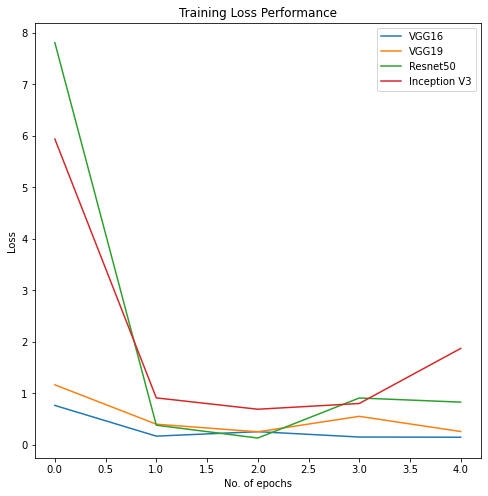

<Figure size 432x288 with 0 Axes>

In [65]:
# plot the training loss
plt.figure(figsize=(8,8))
plt.plot(r_vgg16.history['loss'], label='VGG16')
plt.plot(r_vgg19.history['loss'], label='VGG19')
plt.plot(r_resnet50.history['loss'], label='Resnet50')
plt.plot(r_inception.history['loss'], label='Inception V3')
plt.title('Training Loss Performance')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('Training_Loss.png')

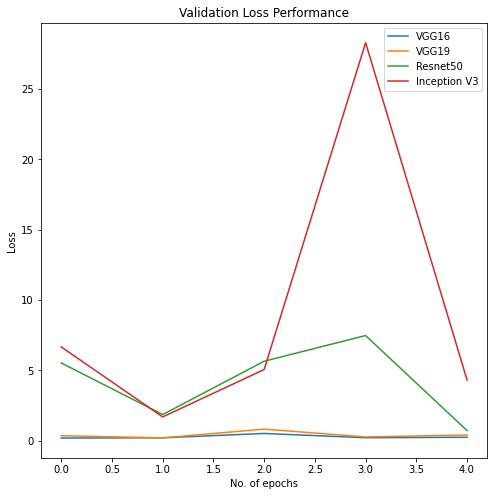

<Figure size 432x288 with 0 Axes>

In [56]:
# plot the validation loss
plt.figure(figsize=(8,8))
plt.plot(r_vgg16.history['val_loss'], label='VGG16')
plt.plot(r_vgg19.history['val_loss'], label='VGG19')
plt.plot(r_resnet50.history['val_loss'], label='Resnet50')
plt.plot(r_inception.history['val_loss'], label='Inception V3')
plt.title('Validation Loss Performance')
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('Validation_Loss')

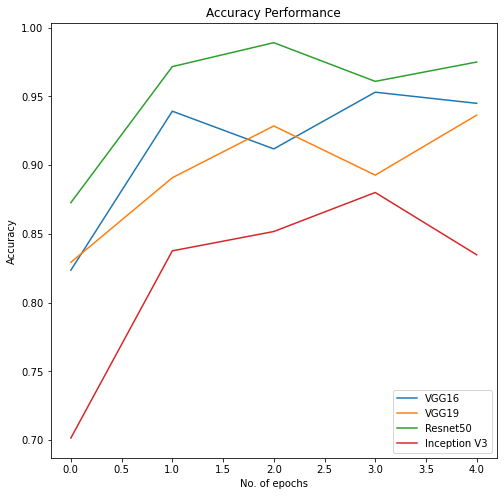

<Figure size 432x288 with 0 Axes>

In [57]:
# plot the accuracy
plt.figure(figsize=(8,8))
plt.plot(r_vgg16.history['accuracy'], label='VGG16')
plt.plot(r_vgg19.history['accuracy'], label='VGG19')
plt.plot(r_resnet50.history['accuracy'], label='Resnet50')
plt.plot(r_inception.history['accuracy'], label='Inception V3')
plt.title('Accuracy Performance')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')

### Perfomance Analysis
- The top performing models are VGG16, VGG19 and Resnet50.
- Considering the overall performance of training loss, validation loss and accuracy, VGG16 can be used for prediction